# Assignment 18

In [46]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [47]:
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None,
                                    feature_names=features,
                                    filled=True, rounded=True,
                                    special_characters=True)

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph


def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

def normalise_rmse(rmse, max_val, min_val):
    return rmse / (max_val - min_val)

In [48]:
Pokemon = pd.read_csv("../files/All_Pokemon.csv")
Pokemon.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [49]:
features = ["Att", "Def", "Spa", "Spd", "Spe"]
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(Pokemon[features], Pokemon["Def"])

DecisionTreeRegressor(max_depth=3)

In [50]:
Pokemon_Train, Pokemon_Test = train_test_split(Pokemon, test_size=0.3, random_state=42,)

## Decision Tree Regression: Predicting Defense based on Attack, defense, Special Attack, Special Defense, and Speed

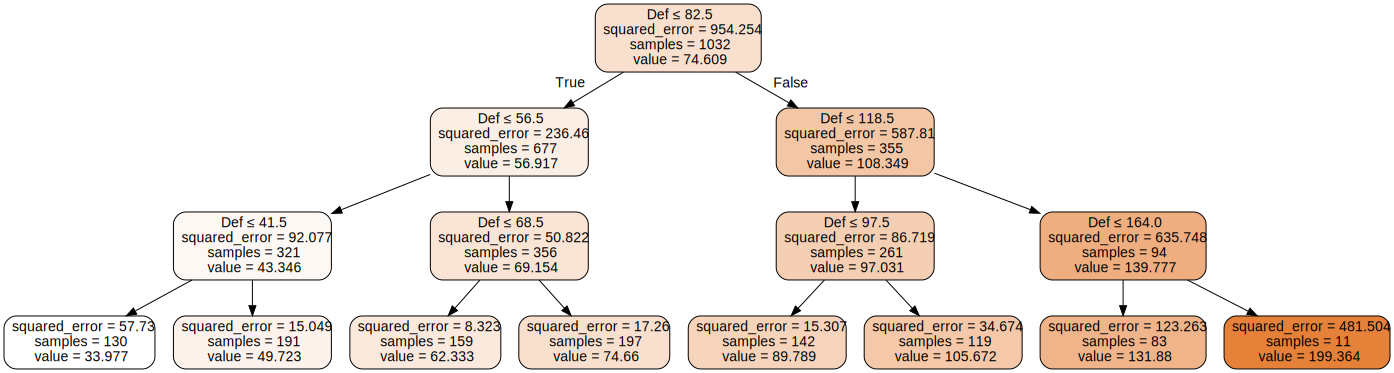

In [51]:
plot_tree_regression(dt, features)

In [52]:
PredictionsOnTrain = dt.predict(Pokemon_Train[features])
PredictionsOnTest = dt.predict(Pokemon_Test[features])

rmse_train = calculate_rmse(PredictionsOnTrain, Pokemon_Train.HP)
rmse_test = calculate_rmse(PredictionsOnTest, Pokemon_Test.HP)

print("RMSE on train: ", rmse_train)
print("RMSE on test: ", rmse_test)

RMSE on train:  33.05496929777978
RMSE on test:  36.175623224267646


These Results are non normalized however, so we will normalize them to get a better idea of how well the model is performing.

In [53]:
print("Normalised RMSE on train: ", normalise_rmse(rmse_train, Pokemon_Train.HP.max(), Pokemon_Train.HP.min()))
print("Normalised RMSE on test: ", normalise_rmse(rmse_test, Pokemon_Test.HP.max(), Pokemon_Test.HP.min()))

Normalised RMSE on train:  0.132750880713975
Normalised RMSE on test:  0.1476556049970108


The normalized RMSE is 0.14 on the test set and 0.13 on the train set. What result do we get with no max depth?

In [54]:
dt = DecisionTreeRegressor()
dt.fit(Pokemon[features], Pokemon["Def"])


DecisionTreeRegressor()

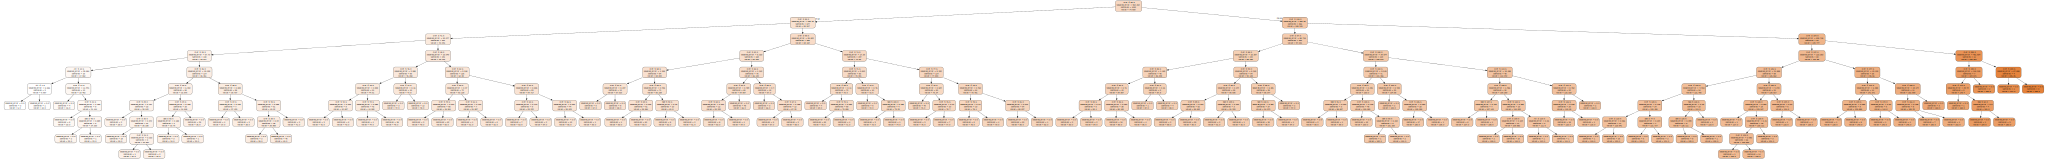

In [55]:
plot_tree_regression(dt, features)

In [56]:
PredictionsOnTrain = dt.predict(Pokemon_Train[features])
PredictionsOnTest = dt.predict(Pokemon_Test[features])

rmse_train = calculate_rmse(PredictionsOnTrain, Pokemon_Train.HP)
rmse_test = calculate_rmse(PredictionsOnTest, Pokemon_Test.HP)

print("RMSE on train: ", rmse_train)
print("RMSE on test: ", rmse_test)

RMSE on train:  33.68867157959458
RMSE on test:  37.8215248494225


In [57]:
print("Normalised RMSE on train: ", normalise_rmse(rmse_train, Pokemon_Train.HP.max(), Pokemon_Train.HP.min()))
print("Normalised RMSE on test: ", normalise_rmse(rmse_test, Pokemon_Test.HP.max(), Pokemon_Test.HP.min()))

Normalised RMSE on train:  0.1352958697975686
Normalised RMSE on test:  0.1543735708139694


The results are very similar, there seems to be no case of overfitting which is great.